<a href="https://colab.research.google.com/github/yazhinil/FMML20230017/blob/main/Module%2005%20Lab%2003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the necessary packages

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt


In [2]:
def performExperiment(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1, drawTree = (8,6)):
  #Importing the Decision tree classifier from sklearn:

  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

  if drawTree:
    print("Here is a diagram of the tree created to evaluate each sample:")
    fig, ax = plt.subplots(figsize=drawTree)
    imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names = feature_names, class_names = class_names, impurity=False, proportion=True, rounded=True, fontsize = 10)
    plt.show()

def returnAccuracy(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1):
  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\

                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  return accuracy_score(y_pred, y_test)

def giveAnExample(n : int):
  performExperiment((X_train, y_train),  (X_test, y_test), feature_names = iris["feature_names"], class_names = iris["target_names"], max_depth = n)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.show()

In [3]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

Text(0.5, 0, 'Depth of the tree')

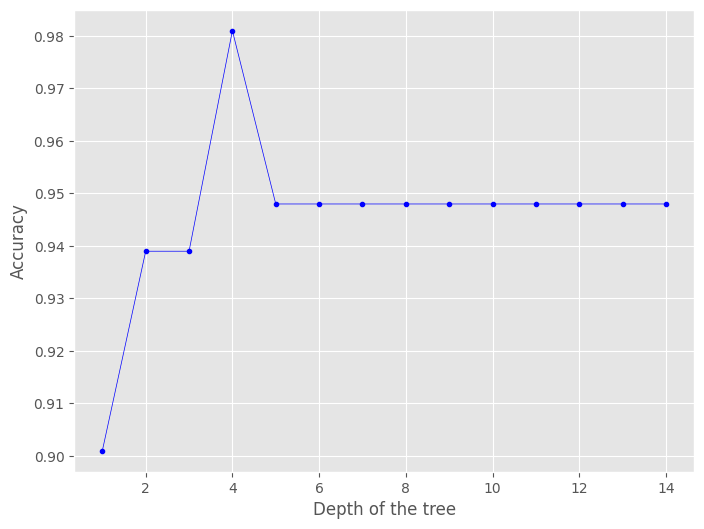

In [5]:
X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

plt.figure(figsize=(8,6))
fro, to = 1, 15
plt.plot(range(fro, to), [returnAccuracy((X, y), (testAr, testy), max_depth = i) for i in range(fro, to)], "b.-", linewidth=0.5)
plt.ylabel("Accuracy")
plt.xlabel("Depth of the tree")

Depth = 1


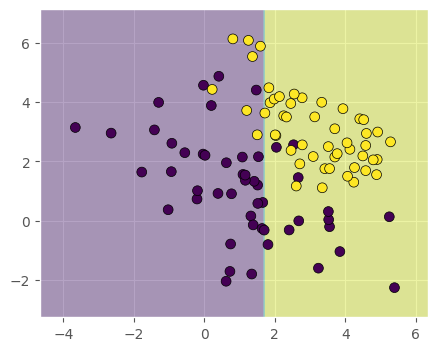

Depth = 2


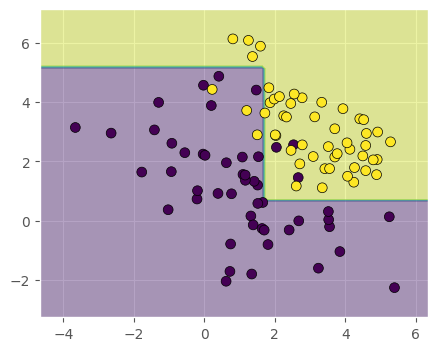

Depth = 4


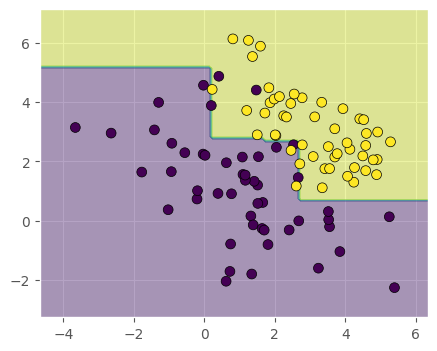

Depth = 8


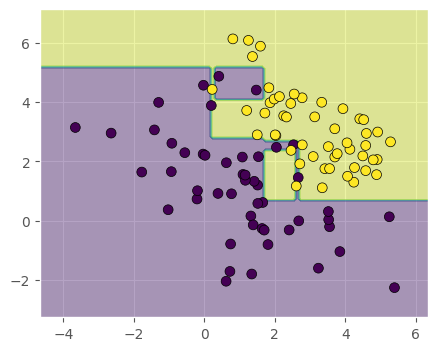

In [6]:
def boundaryExp(d) :

  clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = d)
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  print("Depth = {}".format(d))
  plotDecisionBoundary(X, y, pair, clf)
  plt.show()


_ = [boundaryExp(i) for i in [1, 2, 4, 8]]

In [27]:
import os
os.system("wget https://raw.githubusercontent.com/Foundations-in-Modern-Machine-Learning/course-contents/main/Classification2/data/titanic/train.csv")

0

In [14]:
import os
os.listdir()

['.config', 'train.csv', 'sample_data']

In [15]:
import pandas as pd
trainDf = pd.read_csv("train.csv")

In [16]:
# Preprocessing:

trainDf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
trainDf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
for idx, row in trainDf.iterrows():
  if row["Sex"] == "female":
    trainDf.at[idx, "Sex"] = 0
  else:
    trainDf.at[idx, "Sex"] = 1

In [19]:
# Since we are only exploring, lets make a validation set out of trainDf:

trainSet, testSet = train_test_split(trainDf, random_state = 0)

In [20]:
def relevantInfo(df):
  X = df.iloc[:, [2, 4, 5, 6, 7, 9]]
  y = df.iloc[:, 1]

  #Preprocessing to handle the missing data using a regressor
  imp = IterativeImputer(max_iter = 10, random_state=0)
  imp.fit(X)
  newDf = imp.transform(X)

  return newDf , y.to_numpy()

In [21]:
trainX, trainy = relevantInfo(trainSet)
testX, testy = relevantInfo(testSet)

Accuracy of the decision tree on the test set: 

0.816


Here is a diagram of the tree created to evaluate each sample:


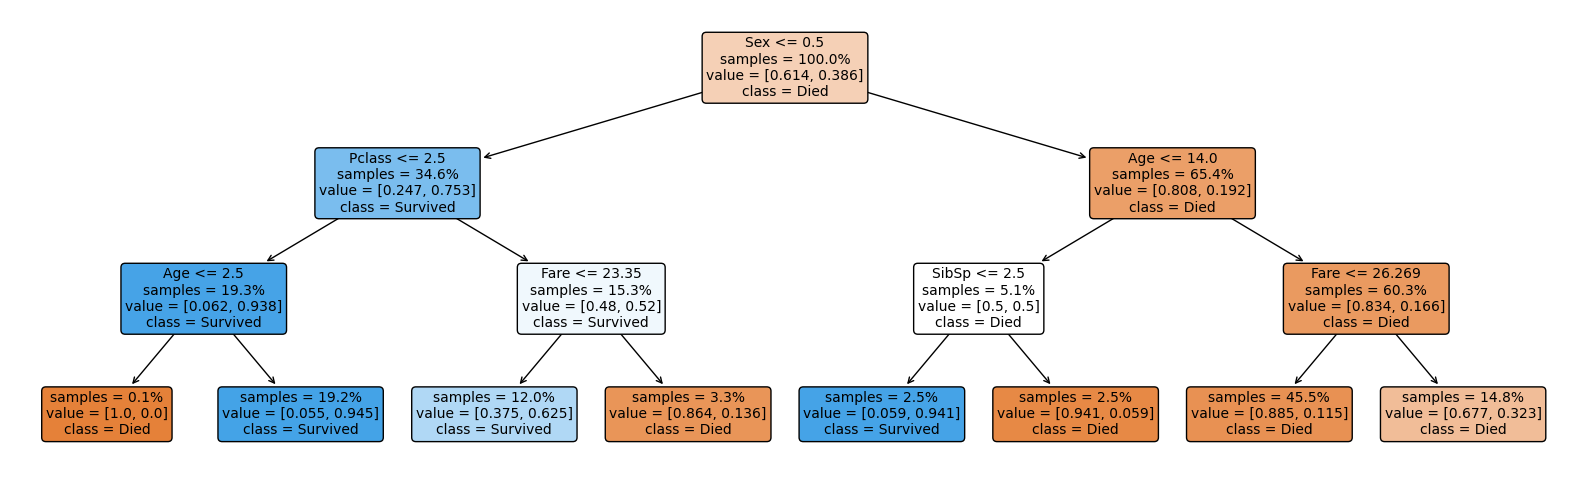

In [22]:
performExperiment((trainX, trainy), (testX, testy), max_depth = 3, feature_names=[trainDf.columns[i] for i in [2, 4, 5, 6, 7, 9]], class_names=["Died", "Survived"], drawTree=(20, 6))

In [24]:
MAX_DEPTH = 8 #@param {type: "slider", min: 2, max: 10}
CRITERION =  "gini" #@param ["gini", "entropy"]
MIN_SAMPLES_TO_SPLIT = 6 #@param {type:"slider", min:2, max:20, step:2}
MIN_SAMPLES_IN_LEAF = 19 #@param {type: "slider", min: 1, max: 50}

plt.style.use("default")
performExperiment((trainX, trainy),\
                  (testX, testy),\
                  max_depth = MAX_DEPTH,\
                  feature_names=[trainDf.columns[i] for i in [2, 4, 5, 6, 7, 9]],\
                  class_names=["Died", "Survived"],\
                  min_samples_split = MIN_SAMPLES_TO_SPLIT,\
                  min_samples_leaf = MIN_SAMPLES_IN_LEAF,\
                  drawTree=False)

Accuracy of the decision tree on the test set: 

0.803




<ipython-input-25-de6dadcdb08a>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0.5, 0, 'Depth of the tree')

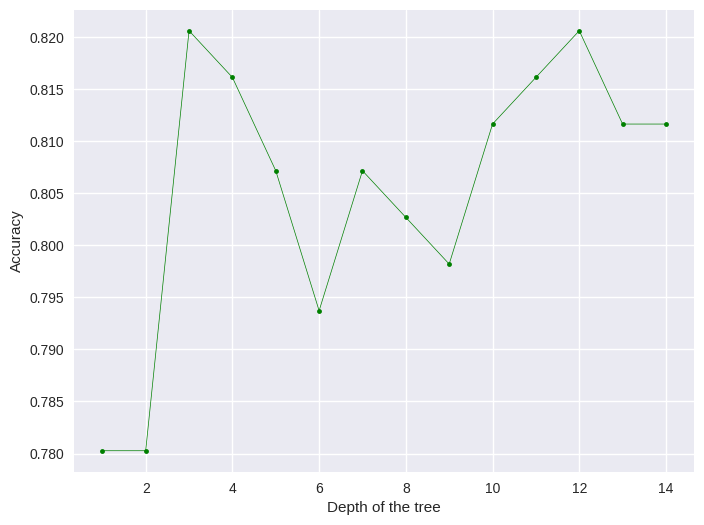

In [25]:
plt.style.use("seaborn")
plt.figure(figsize=(8,6))
fro, to = 1, 15
plt.plot(range(fro, to), [returnAccuracy((trainX, trainy), (testX, testy), max_depth = i, min_samples_leaf=3, min_samples_split=6, criterion="entropy") for i in range(fro, to)], "g.-", linewidth=0.5)
plt.ylabel("Accuracy")
plt.xlabel("Depth of the tree")